11490434/11490434 [==============================] - 0s 0us/step
Epoch 1/5
938/938 [==============================] - 52s 53ms/step - loss: 0.1811 - accuracy: 0.9456 - val_loss: 0.0685 - val_accuracy: 0.9786
Epoch 2/5
938/938 [==============================] - 41s 44ms/step - loss: 0.0513 - accuracy: 0.9837 - val_loss: 0.0415 - val_accuracy: 0.9870
Epoch 3/5
938/938 [==============================] - 43s 46ms/step - loss: 0.0357 - accuracy: 0.9889 - val_loss: 0.0327 - val_accuracy: 0.9889
Epoch 4/5
938/938 [==============================] - 41s 43ms/step - loss: 0.0277 - accuracy: 0.9911 - val_loss: 0.0297 - val_accuracy: 0.9913
Epoch 5/5
313/313 [==============================] - 3s 9ms/step


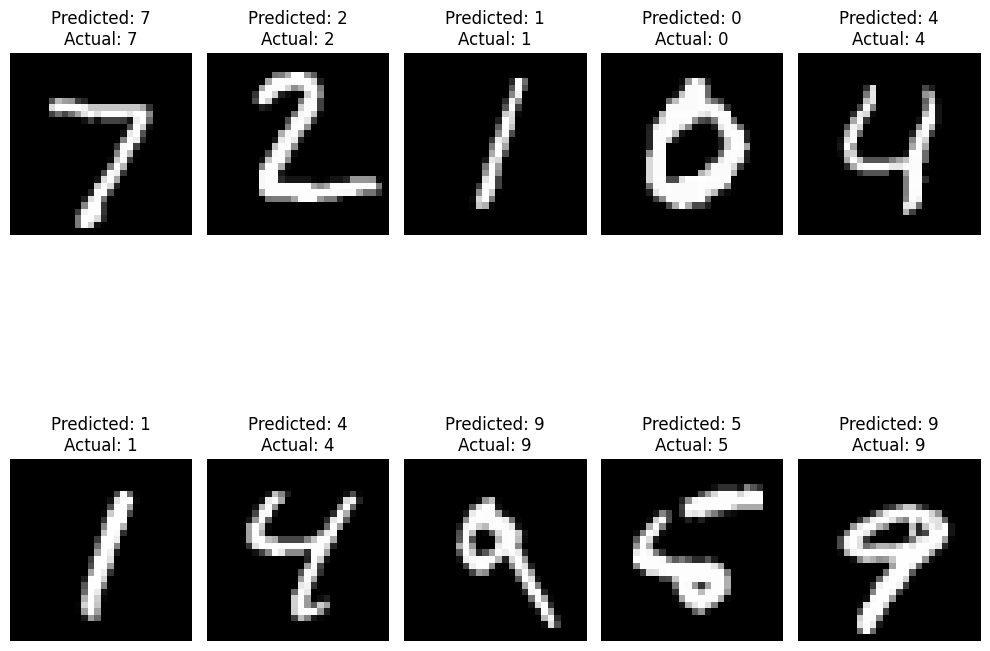

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Load and preprocess the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = np.expand_dims(x_train, axis=-1).astype('float32') / 255.0
x_test = np.expand_dims(x_test, axis=-1).astype('float32') / 255.0

# Convert labels to one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

# Build the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# Train the model
model.fit(x_train, y_train, epochs=5, batch_size=64, validation_data=(x_test, y_test))

# Recognize characters and display recognized labels
predictions = model.predict(x_test)
recognized_labels = np.argmax(predictions, axis=1)

# Display images and recognized labels
plt.figure(figsize=(10, 10))
for i in range(10):
  plt.subplot(2, 5, i + 1)
  plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
  plt.title(f"Predicted: {recognized_labels[i]}\nActual: {np.argmax(y_test[i])}")
  plt.axis('off')
plt.tight_layout()
plt.show()